In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
titanic_data = pd.read_csv(r"E:\DS_ML_PYTHON\DS_ML\Module4_Machine_Learning\Supervised_ML\Day15_Logistic_regression\Input_files\Titanic-Copy1.csv")

In [4]:
titanic_data.head()

,Unnamed: 0,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [4]:
titanic_data.drop(['Unnamed: 0','Cabin','Name','PassengerId','Ticket'], axis=1, inplace=True)

In [5]:
titanic_data.head(2)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,male,1,0.0
1,38.0,C,71.2833,0,1,female,1,1.0


In [39]:
titanic_data.columns

Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived'],
      dtype='object')

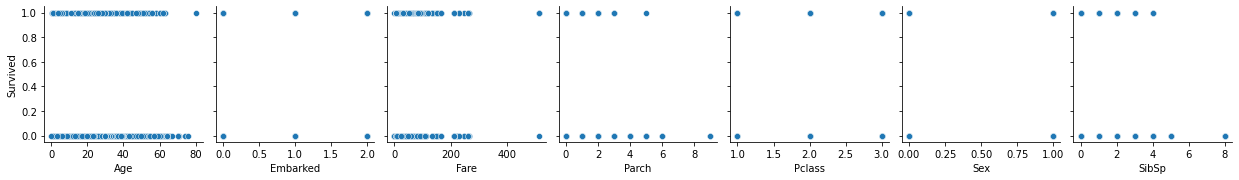

In [41]:
sns.pairplot(titanic_data,x_vars=['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp'],y_vars=['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

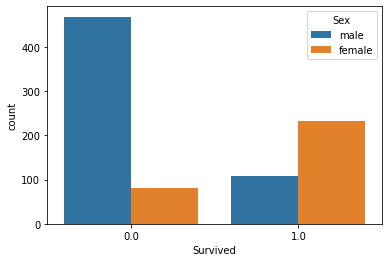

In [6]:
sns.countplot(x=titanic_data['Survived'], hue=titanic_data['Sex'])

In [7]:
len(titanic_data)

1309

In [8]:
titanic_data.isna().sum()

Age         263
Embarked      2
Fare          1
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived    418
dtype: int64

In [9]:
titanic_data.dtypes

Age         float64
Embarked     object
Fare        float64
Parch         int64
Pclass        int64
Sex          object
SibSp         int64
Survived    float64
dtype: object

In [10]:
titanic_data['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [11]:
#Finding mean values using Pandas and Numpy
print(f"Pandas Mean: {titanic_data['Survived'].mean()}")
print(f"Numpy Mean: {np.mean(titanic_data['Survived'])}")

Pandas Mean: 0.3838383838383838
Numpy Mean: 0.3838383838383838


In [12]:
#Treat Missing values in Survived column
# df['Survived'].fillna(0, inplace = True) 
# df['Survived'].fillna(method = 'bfill', inplace = True)
titanic_data['Survived'].fillna(method = 'ffill', inplace = True) #ForwardFill

In [13]:
titanic_data.isna().sum()

Age         263
Embarked      2
Fare          1
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived      0
dtype: int64

In [14]:
#Gets Mean of each column
titanic_data.mean()

C:\Users\Kishore kumar V\AppData\Local\Temp\ipykernel_15828\3439877492.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic_data.mean()


Age         29.881138
Fare        33.295479
Parch        0.385027
Pclass       2.294882
SibSp        0.498854
Survived     0.261268
dtype: float64

In [15]:
#Other integer columns having missing values are treated with Mean
titanic_data.fillna(titanic_data.mean(),inplace=True)

C:\Users\Kishore kumar V\AppData\Local\Temp\ipykernel_15828\1489991537.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic_data.fillna(titanic_data.mean(),inplace=True)


In [16]:
titanic_data.isna().sum()

Age         0
Embarked    2
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
dtype: int64

In [17]:
titanic_data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,male,1,0.0
1,38.0,C,71.2833,0,1,female,1,1.0
2,26.0,S,7.9250,0,3,female,0,1.0
3,35.0,S,53.1000,0,1,female,1,1.0
4,35.0,S,8.0500,0,3,male,0,0.0


In [9]:
titanic_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [19]:
titanic_data['Embarked'].fillna('S', inplace=True) #Mode

In [20]:
titanic_data.isna().sum()

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
dtype: int64

In [21]:
titanic_data.dtypes

Age         float64
Embarked     object
Fare        float64
Parch         int64
Pclass        int64
Sex          object
SibSp         int64
Survived    float64
dtype: object

In [22]:
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [23]:
titanic_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [24]:
Cat_cols=['Embarked','Sex']
for col in Cat_cols:
    titanic_data[col]=titanic_data[col].astype('category')
    titanic_data[col]=titanic_data[col].cat.codes
    

In [25]:
titanic_data.dtypes

Age         float64
Embarked       int8
Fare        float64
Parch         int64
Pclass        int64
Sex            int8
SibSp         int64
Survived    float64
dtype: object

In [26]:
titanic_data['Survived'].unique()

array([0., 1.])

In [27]:
#Convert float to int
titanic_data['Survived']=titanic_data['Survived'].astype('int')

In [28]:
titanic_data['Survived'].unique()

array([0, 1])

In [29]:
titanic_data.head(2)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,2,7.2500,0,3,1,1,0
1,38.0,0,71.2833,0,1,0,1,1


In [30]:
#Splitting Data into IV's and DV
X= titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [31]:
#Split data into train data and test data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=555)


In [32]:
len(X_train),len(X_test)

(1047, 262)

In [33]:
#Calling the model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

C:\Users\Kishore kumar V\pythonconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [35]:
from sklearn.metrics import confusion_matrix
display(confusion_matrix(y_test,y_pred))

array([[178,  14],
       [ 40,  30]], dtype=int64)

In [36]:
# Rightly classified count / All counts
(178+30)/(178+14+40+30)

0.7938931297709924

In [37]:
#Accuracy Score
from sklearn.metrics import accuracy_score
display(accuracy_score(y_test,y_pred))

0.7938931297709924

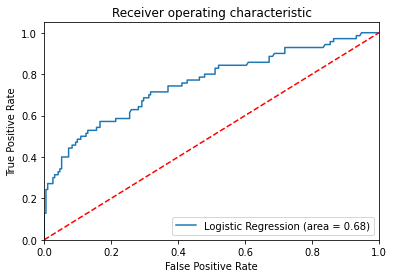

In [38]:
#roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, threshold = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()